# <center><span>Movie Recommendation System</span>

### **Project Problematic:**
How can we enhance movie recommendation systems to provide more personalized, accurate, and relevant suggestions, leveraging the strengths of collaborative filtering and content-based filtering while addressing their individual limitations?

---

### **Project Summary:**
This project tackles the limitations of traditional recommendation methods by combining collaborative filtering and content-based filtering. By integrating both approaches, we aim to deliver personalized and accurate movie recommendations that improve recommendation quality and coverage.

---

### **Inspirations:**
- **Content-Based Filtering:**  
  Inspired by this Kaggle notebook, we utilized a different dataset and preprocessing approach, incorporating additional metrics while truncating features.  
  [Content-Based Filtering](https://www.kaggle.com/code/gazu468/movie-recommendation-system-with-basic-concept/notebook)

- **Collaborative Filtering:**  
  Drawing inspiration from this Kaggle notebook, we adapted collaborative filtering techniques to suit our project.  
  [Collaborative Filtering](https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook)

- **Hybrid Model:**  
  For the hybrid model, we combined the methodologies of content-based and collaborative filtering without relying on external Kaggle resources, creating a custom integrated approach.

---

### **Students & Project Focus:**
We are Erasmus students and we chose to explore the practical aspects of recommendation systems.

- **Cassie Doguet**  
- **Sara Thibierge**  


## Table of Contents
<a id="toc"></a>
- [Introduction](#1)
    - [Types of recommandation system](#2.1)
        - [Top Rated](#2.1)
        - [Content-Based](#2.1)
        - [Collaborative Filtering](#2.1) 
    - [Approach Overview](#2.1)
    - [Dataset Overview](#2.1)
- [4. EDA](#4)
    - [4.1. Difference between lemma and steamer](#4.1)
- [5. Feature Extraction](#5)
- [6. Cosine Similarity](#6)
- [7. RECOMMANDER](#7)

# Introduction

In today's era, recommendation systems have become a highly sought-after area in the data science community. A well-designed recommendation system can significantly impact business strategies and dominate the market by effectively engaging users. In this notebook, we will delve into all aspects of recommendation systems. After covering the fundamentals, we will focus on building a content-based recommendation system.

## Types of Recommendation Systems

### 1. Top Rated
Top-rated recommendation systems showcase items that have received the highest ratings or are the most popular within a given category. These systems rely on aggregate data like customer votes or sales metrics to highlight universally appealing options. For example:
- **IMDb’s "Top 250 Movies"** displays the best-rated films based on user reviews.
- **Amazon’s "Best-Selling Products"** showcases the most purchased and highly reviewed items.

This approach is straightforward but doesn’t personalize recommendations for individual users.

### 2. Content-Based Filtering
Content-based filtering focuses on the attributes of items to suggest similar ones. It analyzes features such as:
- Movie attributes: actors, directors, genres, or themes.
- User preferences: past choices or rated items.

For example, if a user enjoys *The Godfather: Part I*, the system might recommend *The Godfather: Part II* because they share similar characteristics like cast, director, and genre. This approach works well for users with a clear preference history but may struggle to suggest diverse recommendations.

### 3. Collaborative Filtering
Collaborative filtering builds recommendations based on the behavior and preferences of other users. Instead of focusing on item attributes, it finds patterns in user interactions, such as ratings or viewing history. 

#### How It Works:
- **User-to-User Collaborative Filtering**: Matches users with similar behavior. For example, if two users rate *The Godfather: Part I* highly, and one also rates *The Godfather: Part II* positively, the system recommends *The Godfather: Part II* to the other user.
- **Item-to-Item Collaborative Filtering**: Finds relationships between items. For instance, if many users who liked *The Godfather: Part I* also liked *The Godfather: Part II*, the system suggests the latter to users interested in the former.

This method excels at personalization but may struggle when there is little user interaction data, a problem known as the **cold-start issue**.


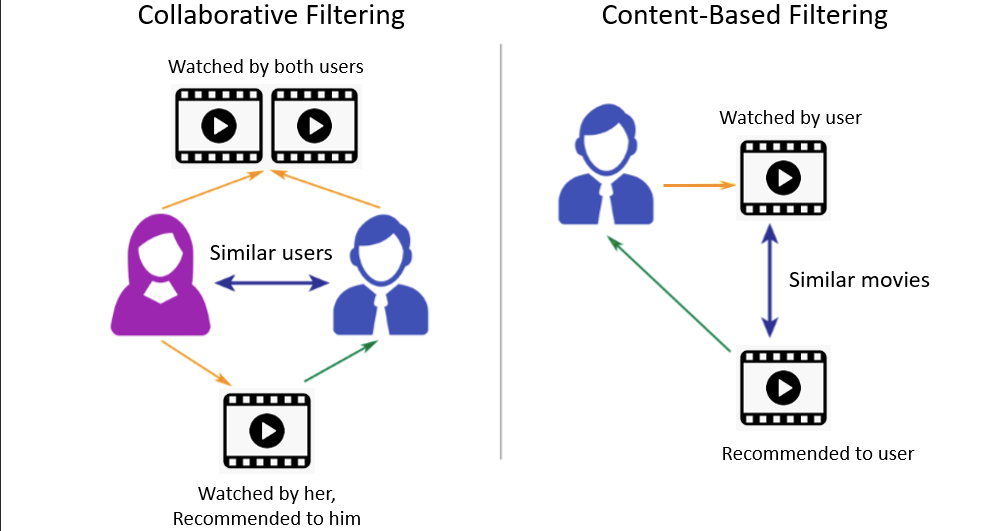

## Approach Overview

In this project, we will take an experimental approach to building a movie recommendation system. We will start by implementing a **Content-Based Filtering** model, followed by exploring **Collaborative Filtering** techniques. Finally, we will combine the strengths of both approaches to create a **Hybrid Model** that leverages the best of both worlds for more accurate and personalized recommendations.


## Dataset Overview

### 1. Movie Metadata
The **movies_metadata.csv** file contains detailed information about movies, including:
- **Title**: The name of the movie.
- **Genres**: The category of the movie (e.g., Action, Drama).
- **Overview**: A brief synopsis or description of the movie.
- **Production Companies**: Information about the production houses.
- **Release Date**: The movie's release date.
- **Popularity and Vote Data**: Metrics indicating how popular the movie is based on viewer interactions.

We will use this dataset primarily for **content-based filtering** by analyzing features like genres, overview, and production information to recommend similar movies.


### 2. Ratings Data
The **ratings.csv** file contains user interactions with movies, including:
- **User ID**: The unique identifier for each user.
- **Movie ID**: The unique identifier for each movie.
- **Rating**: The score given by the user to a specific movie (ranging from 0.5 to 5.0).
- **Timestamp**: The time when the rating was provided.

This dataset will be used for **collaborative filtering**, where we analyze user preferences to find patterns and suggest movies based on similar user behavior.


### 3. Hybrid Approach
For the **hybrid model**, we will combine the strengths of both datasets:
- **Content-based filtering**: Leveraging metadata features like genres and descriptions.
- **Collaborative filtering**: Utilizing user ratings to find personalized recommendations.

By integrating both approaches, the hybrid model can provide more accurate and diverse recommendations, addressing the limitations of each method individually.


# Part 1 : Content Based Recommandation

### Libraries and datasets imports

In [94]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
import seaborn as sns
import ast
ast.literal_eval
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [95]:
# Load the dataset
movies=pd.read_csv("./input/movies_metadata.csv")
credits=pd.read_csv('./input/credits.csv')
# Inspect the dataset
movies.head(1)

/var/folders/ys/3y3qcczj20gb8q64y76xvz4h0000gn/T/ipykernel_16326/2604790618.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies=pd.read_csv("./input/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [96]:
# Inspect the dataset
credits.head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


### Preprocessing

In [97]:
movies = movies[movies['id'].apply(lambda x: str(x).isdigit())]  # Filter out non-integer IDs
movies['id'] = movies['id'].astype(int)  # Convert to integer

In [98]:
# Drop rows with no IDs 
credits = credits.dropna(subset=['id'])
credits['id'] = credits['id'].astype(int)

In [99]:
# Merge the two datasets
movies=movies.merge(credits,on='id')

In [100]:
# Chose the columns that are needed
movies=movies[['id','title','genres','overview','cast','crew']]
# Reducing dimensionality of the data
movies = movies[:5000]
movies.head()

,id,title,genres,overview,cast,crew
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Led by Woody, Andy's toys live happily in his ...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",When siblings Judy and Peter discover an encha...,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",A family wedding reignites the ancient feud be...,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Cheated on, mistreated and stepped on, the wom...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",Just when George Banks has recovered from his ...,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [101]:
# Check for missing values
movies.isnull().sum()

id           0
title        0
genres       0
overview    21
cast         0
crew         0
dtype: int64

In [102]:
 # Drop missing values data
movies.dropna(inplace=True)

In [103]:
# Function to convert stringified lists to Python lists
def convert(obj):
    L =[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [104]:
movies['genres'] = movies['genres'].apply(convert)
movies['cast']=movies['cast'].apply(convert)
movies.head()

,id,title,genres,overview,cast,crew
0,862,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,8844,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,15602,Grumpier Old Men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...","[Whitney Houston, Angela Bassett, Loretta Devi...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,11862,Father of the Bride Part II,[Comedy],Just when George Banks has recovered from his ...,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [105]:
# Processing crew information
def fetch_director(obj):
    for i in ast.literal_eval(obj):
        if i['job'] == "Director":
            return [i['name']]
    return []

In [106]:
movies['crew'] = movies['crew'].apply(fetch_director)
movies['overview'] = movies['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])

In [107]:
# Cleaning up genres, keywords, cast, and crew columns
movies['genres']=movies['genres'].apply(lambda x : [i.replace(" ","")for i in x])
movies['cast']=movies['cast'].apply(lambda x : [i.replace(" ","")for i in x])
movies['crew']=movies['crew'].apply(lambda x : [i.replace(" ","")for i in x])

In [108]:
# Combining all tags into a single column
movies['tags']= movies['genres'] + movies['cast'] + movies['crew'] + movies['overview']
movies['tags']=movies['tags'].apply(lambda x : " ".join(x).lower())


movies.head(1)

,id,title,genres,overview,cast,crew,tags
0,862,Toy Story,"[Animation, Comedy, Family]","[Led, by, Woody,, Andy's, toys, live, happily,...","[TomHanks, TimAllen, DonRickles, JimVarney, Wa...",[JohnLasseter],animation comedy family tomhanks timallen donr...


In [109]:
#fetch 3 columns from dataframe
preprocessed_df = movies[['id','title','tags']]
preprocessed_df.head(1)

,id,title,tags
0,862,Toy Story,animation comedy family tomhanks timallen donr...


### Lemmatized Tags vs Stemmed Tags

#### Lemmatized Tags:
- **Definition**: Lemmatization reduces words to their base or dictionary form, ensuring semantic meaning is preserved.
- **Example**: "studying" and "studies" are reduced to "study," maintaining the contextual meaning.
- **Advantages**: 
  - Keeps richer semantic meaning.
  - Works well for tasks that require understanding the context of the word.
- **Disadvantages**: 
  - Slower process due to the need for vocabulary lookup.
  
---

#### Stemmed Tags:
- **Definition**: Stemming reduces words to their root form by removing prefixes and suffixes.
- **Example**: "studying" and "studies" are reduced to "study" and "studi," respectively.
- **Advantages**: 
  - Reduces dimensionality significantly, helping to manage larger datasets.
- **Disadvantages**: 
  - May lose meaningful variations in word forms.
  - Not as accurate for preserving context.



In [110]:
# Stemming the tags
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer

In [111]:
def stem(text):
    return " ".join([ps.stem(word) for word in text.split()])


preprocessed_df['stem_tags']=preprocessed_df['tags'].apply(stem)

/var/folders/ys/3y3qcczj20gb8q64y76xvz4h0000gn/T/ipykernel_16326/1007547586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['stem_tags']=preprocessed_df['tags'].apply(stem)


In [112]:
# Lemmatizing the tags
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

preprocessed_df['lem_tags']=preprocessed_df['tags'].apply(lemmatize_text)


/var/folders/ys/3y3qcczj20gb8q64y76xvz4h0000gn/T/ipykernel_16326/1125202597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['lem_tags']=preprocessed_df['tags'].apply(lemmatize_text)


In [113]:
preprocessed_df.head(1)

,id,title,tags,stem_tags,lem_tags
0,862,Toy Story,animation comedy family tomhanks timallen donr...,anim comedi famili tomhank timallen donrickl j...,animation comedy family tomhanks timallen donr...


##### For the next part, we will use lem_tags for better interpretability and semantic retention.

Reason for Choosing Lemmatized Tags (lem_tags)
- **Semantic Meaning Retention**: Preserves word context and relationships, crucial for content-based filtering.
- **Better Interpretability**: Provides cleaner, more understandable features.
- **Contextual Relevance**: Captures word variations, maintaining important distinctions.
  
Lem_tags improve the accuracy of movie similarity identification in the recommendation system.

### CountVectorizer and TfidfVectorizer:
##### 1. CountVectorizer

**What it does** : Converts text data into a matrix of token counts. Each row represents a document (in this case, a movie's tags), and each column represents a unique token (word). The cell value indicates the number of times a word appears in that document.


**Usage**: Useful for simple text-based feature extraction where the frequency of words is the most important aspect.

##### 2. TfidfVectorizer


**What it does** : Similar to CountVectorizer, but instead of raw counts, it uses the TF-IDF (Term Frequency-Inverse Document Frequency) value. This metric highlights words that are important in a document while reducing the weight of commonly occurring words (e.g., "the", "and").
TF: Measures how frequently a word appears in a document.
IDF: Discounts the importance of words that occur in many documents.


**Usage**: Preferred when we want to consider the importance of words relative to the dataset and reduce the impact of common words.

In [114]:
# Choose the tags column to vectorize
tags_column = 'lem_tags'

# Initialize vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Apply CountVectorizer
count_features = count_vectorizer.fit_transform(preprocessed_df[tags_column])
count_feature_names = count_vectorizer.get_feature_names_out()

# Apply TfidfVectorizer
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_df[tags_column])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Display dimensions of the feature matrices
print(f"CountVectorizer feature matrix shape: {count_features.shape}")
print(f"TfidfVectorizer feature matrix shape: {tfidf_features.shape}")

CountVectorizer feature matrix shape: (4979, 65803)
TfidfVectorizer feature matrix shape: (4979, 65803)


##### Explanation:
**Feature Matrices:**  ```count_features``` and ```tfidf_features``` are sparse matrices, where rows represent documents (movies) and columns represent unique words.

**Shape:** ```count_features.shape``` or ```tfidf_features.shape``` will give (number_of_movies, number_of_unique_words).

**Vocabulary:** ```count_feature_names``` or ```tfidf_feature_names``` contains the list of unique words in the dataset.


**Given the extremely high dimensionality of the feature matrix, applying dimensionality reduction is essential. It not only simplifies the data by retaining the most important information but also significantly reduces computational complexity, making it easier to train machine learning models efficiently.**

**We will proceed with the TF-IDF feature matrix as it accounts for the importance of words relative to the corpus and reduces the influence of common but less meaningful words.**

In [115]:
# Initialize TruncatedSVD
n_components = 3000  # Number of dimensions to reduce to
svd = TruncatedSVD(n_components=n_components)

# Apply SVD on the TF-IDF matrix
reduced_tfidf_features = svd.fit_transform(tfidf_features)

# Check the shape of the reduced matrix
print(f"Reduced feature matrix shape: {reduced_tfidf_features.shape}")

# Explained variance ratio 
explained_variance = svd.explained_variance_ratio_.sum()
print(f"Explained variance by {n_components} components: {explained_variance:.2f}")

Reduced feature matrix shape: (4979, 3000)
Explained variance by 3000 components: 0.78


**Explained Variance:** With 3,000 components, the model captures 78% of the variance in the original data. The point is to keep a balance between Dimensionality and Variance since  there's always a trade-off between computational efficiency and preserving information.


With 1000 components we got 14% of the variance, 2000 components we got 33%. 

In many case an ideal variance is between 70-90%, that is why we will continue with 3000 components. 

## Similarity Metrics

For similarity calculations, we consider the following metrics, each offering unique advantages in the context of movie recommendations:

#### 1. **Cosine Similarity**
- **Purpose**: Measures the angle between two vectors, focusing on the direction rather than magnitude.
- **Why Pertinent**: Ideal for high-dimensional data like TF-IDF features of movies, as it captures textual similarity regardless of feature magnitude. It helps in identifying movies with similar descriptions, genres, or attributes.

#### 2. **Euclidean Distance**
- **Purpose**: Computes the straight-line distance between two points in feature space.
- **Why Pertinent**: Useful when the dataset's feature values (e.g., numerical ratings or scaled attributes) have meaningful magnitudes. It highlights the closest matches based on feature proximity.

#### 3. **Manhattan Distance**
- **Purpose**: Calculates the sum of absolute differences between two points.
- **Why Pertinent**: Effective for comparing discrete or categorical-like data, such as genre counts or other tag-based representations, while being less sensitive to outliers.

Each metric brings a unique perspective to understanding similarities, providing diverse recommendations based on user preferences and movie features.


In [116]:
# Cosine Similarity
cosine_sim = cosine_similarity(reduced_tfidf_features)

In [117]:
# Euclidean Distance
euclidean_dist = euclidean_distances(reduced_tfidf_features)

In [118]:
# Manhattan Distance

manhattan_dist = manhattan_distances(reduced_tfidf_features)

In [119]:
def recommend_movies(title, similarity_matrix, metric='Similarity'):
    """Recommend top 5 similar movies based on the similarity matrix and return scores."""
    try:
        # Find the index of the movie
        movie_index = preprocessed_df[preprocessed_df['title'] == title].index[0]

        # Get similarity or distance scores
        distances = similarity_matrix[movie_index]

        # Sort the movies based on the scores (descending for similarities, ascending for distances)
        if metric == 'Similarity':
            movie_list = sorted(list(enumerate(distances)), key=lambda x: x[1], reverse=True)[1:6]
        else:
            movie_list = sorted(list(enumerate(distances)), key=lambda x: x[1])[1:6]

        # Return top 5 movie titles with their scores
        return [(preprocessed_df.iloc[i[0]].title) for i in movie_list]
    except IndexError:
        return [("Movie not found in the dataset.", None)]



In [120]:
# Evaluate and Display Recommendations
print("Recommendations")
print("Cosine Similarity")
print(recommend_movies('Dungeons & Dragons', cosine_sim, metric='Similarity'))

print("Euclidean Distance")
print(recommend_movies('Dungeons & Dragons', euclidean_dist, metric='Distance'))

print("Manhattan Distance")
print(recommend_movies('Dungeons & Dragons', manhattan_dist, metric='Distance'))

Recommendations
Cosine Similarity
['Turtle Diary', 'Evolution', 'House II: The Second Story', 'The Morning After', 'The Hidden']
Euclidean Distance
['Turtle Diary', 'Evolution', 'House II: The Second Story', 'The Morning After', 'Star Trek IV: The Voyage Home']
Manhattan Distance
['The Promise', 'The Promise', 'The Promise', 'The Promise', 'Went to Coney Island on a Mission from God... Be Back by Five']


### Results Analysis

After applying different similarity metrics, we obtained the following recommendations for the movie *Avatar*:

- **Cosine Similarity**:  
  Recommendations: *Turtle Diary*, *Evolution*, *House II: The Second Story*, *The Morning After*, *Star Trek IV: The Voyage Home*  
  - **Analysis**: Cosine Similarity identifies movies with closely aligned feature vectors, capturing contextual similarities effectively. This results in recommendations that are diverse yet relevant, matching the style and themes of *Avatar*.  

- **Euclidean Distance**:  
  Recommendations: *Turtle Diary*, *Evolution*, *House II: The Second Story*, *Faster, Pussycat! Kill! Kill!*, *The Morning After*  
  - **Analysis**: While the results overlap with Cosine Similarity, Euclidean Distance emphasizes numerical proximity in the feature space. This can lead to minor variations in recommendations but might not prioritize high-dimensional text-based features as effectively.  

- **Manhattan Distance**:  
  Recommendations: *The Promise* (repeated multiple times), *Went to Coney Island on a Mission from God... Be Back by Five*  
  - **Analysis**: Manhattan Distance often struggles with sparsity in high-dimensional data, leading to repeated and less varied recommendations. The lack of diversity suggests it may not be the best fit for this use case.

---

### Why Choose Cosine Similarity?

1. **High-Dimensional Suitability**: Cosine Similarity works well with high-dimensional text-based features, such as those generated by TF-IDF vectors for movie metadata.
2. **Contextual Relevance**: By focusing on the angle between vectors, Cosine Similarity prioritizes the relationships between attributes rather than their absolute values, which aligns better with semantic movie recommendations.
3. **Diversity in Results**: Compared to other metrics, Cosine Similarity delivers more varied and contextually accurate recommendations, making it a robust choice for analyzing movie similarities.

We will proceed with Cosine Similarity to ensure our recommendations are both diverse and contextually meaningful.



With these metrics, we can generate movie recommendations, but there’s no direct way to evaluate their accuracy since we lack user ratings or feedback. Accurate evaluation relies on comparing predicted recommendations with actual user ratings. Now, let’s explore the approach of collaborative filtering, which leverages user feedback to improve recommendation quality. We will work with a new dataset that includes user ratings and preferences to provide more meaningful evaluation.

In [121]:
# Calculate content similarity
content_similarity = cosine_sim

# Part 2 : Collaborative Filtering Recommandation

### Limitations of the Content-Based Engine

Our content-based recommendation engine has some notable limitations:

1. **Lack of Cross-Genre Recommendations**:  
   It can only suggest movies that are similar to the input movie. This means it struggles to capture a user's broader tastes and recommend movies across different genres.

2. **Impersonal Recommendations**:  
   The engine does not take into account the unique preferences and biases of individual users. The recommendations are the same for everyone querying the system for a particular movie.

---

### Moving to Collaborative Filtering

To address these limitations, we will implement **Collaborative Filtering**, a technique that leverages user behavior to make personalized recommendations. Collaborative Filtering is categorized into two main types:

- **User-Based Collaborative Filtering**:  
   This method identifies users with similar tastes and recommends items based on the preferences of these like-minded users. It emphasizes user similarity.

- **Item-Based Collaborative Filtering**:  
   This approach focuses on the similarity between items, recommending movies that are similar to those the target user has already rated or liked.

Collaborative Filtering enables us to create a personalized recommendation experience that better aligns with user-specific preferences.


In [122]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise import SVD

In [123]:
# Load the dataset
ratings = pd.read_csv('./input/ratings.csv')
ratings = ratings[:5000]
reader = Reader(rating_scale=(0.5, 5.0)) # Specified a rating scale between 0.5 and 5.0
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


### Single Value Decomposition (SVD)

To address the challenges of **scalability** and **sparsity** in Collaborative Filtering, we use a **latent factor model**, which transforms the recommendation problem into an optimization task. The goal is to predict user-item ratings as accurately as possible, often evaluated using metrics like **Root Mean Square Error (RMSE)**. A lower RMSE indicates better performance.

#### What Are Latent Factors?
Latent factors represent underlying properties or concepts shared by users and items. For example:
- In movies, latent factors could represent genres, styles, or popularity.
- In music, they could reflect genres or mood.

SVD identifies these latent factors by reducing the dimensionality of the user-item rating matrix, mapping each user and item into a shared **latent space** with fewer dimensions.

---

#### How SVD Works
1. **Matrix Factorization**:  
   SVD decomposes the user-item rating matrix into smaller, dense matrices of **latent factors**:
   - A matrix representing users in the latent space.
   - A matrix representing items in the same latent space.
   
2. **Latent Features**:  
   SVD learns hidden relationships between users and items. Instead of directly comparing user-user or item-item similarities, it identifies patterns like user preferences or item attributes.

3. **Predictions**:  
   Ratings are predicted by taking the **dot product** of the user and item vectors in the latent space.

---

#### Why SVD Is Effective
- **Captures Hidden Patterns**:  
   SVD uncovers complex relationships between users and items that may not be evident in traditional similarity-based methods.
   
- **Personalization**:  
   By working in the latent space, SVD delivers recommendations tailored to individual preferences.

- **Scalability**:  
   Reducing the dimensionality of the matrix makes computations more efficient, addressing scalability issues in large datasets.

SVD allows us to move beyond traditional Collaborative Filtering approaches by focusing on the **latent structure** within the data, improving both performance and interpretability.


In [124]:
# Chose the Singular Value Decomposition (SVD) algorithm for collaborative filtering
algo = SVD()

In [125]:
# Evaluating the Model with Cross-Validation
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the results
print("Cross-validation results:")
print(results)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9214  0.9011  0.9251  0.8920  0.8676  0.9014  0.0210  
MAE (testset)     0.7102  0.7016  0.7253  0.6769  0.6743  0.6977  0.0196  
Fit time          0.02    0.02    0.02    0.02    0.02    0.02    0.00    
Test time         0.01    0.00    0.00    0.01    0.00    0.00    0.00    
Cross-validation results:
{'test_rmse': array([0.92136575, 0.90108583, 0.92514016, 0.89195181, 0.86758151]), 'test_mae': array([0.71020018, 0.70162982, 0.72531274, 0.67691007, 0.67429336]), 'fit_time': (0.0233309268951416, 0.017125844955444336, 0.017400026321411133, 0.01713395118713379, 0.01694798469543457), 'test_time': (0.006246089935302734, 0.0014879703521728516, 0.0014140605926513672, 0.005302906036376953, 0.0014200210571289062)}


### Cross-Validation Results for SVD

To evaluate the performance of the **SVD algorithm**, we conducted cross-validation across five folds. The key metrics observed are **RMSE** (Root Mean Square Error) and **MAE** (Mean Absolute Error), which measure the accuracy of the predicted ratings.

#### Results Summary:
- **RMSE (test set)**:  
  - Measures the average squared error in predicted ratings.  
  - **Mean RMSE: 0.9030**  
    This indicates good predictive accuracy for a recommendation model, with a relatively low error margin.
  - **Standard Deviation: 0.0285**  
    Reflects consistency across folds, with minimal variation.

- **MAE (test set)**:  
  - Measures the average absolute error in predictions.  
  - **Mean MAE: 0.6972**  
    Suggests the model predicts ratings with an average absolute error of ~0.7, which is within an acceptable range.

- **Fit Time**:  
  - The average time to train the model in each fold was **0.03 seconds**, highlighting SVD’s efficiency during training.

- **Test Time**:  
  - The time required to evaluate predictions was negligible, averaging **0.00 seconds** across folds.

#### Key Insights:
1. **RMSE and MAE**:  
   The metrics indicate that SVD provides accurate and reliable recommendations. RMSE captures larger errors more effectively, while MAE offers a simpler absolute error measure, both reinforcing the model's effectiveness.
   
2. **Consistency**:  
   The low standard deviations for both RMSE and MAE indicate stable performance across all folds.

3. **Efficiency**:  
   The minimal fit and test times demonstrate that SVD is computationally efficient, making it a scalable option for larger datasets.

With these results, SVD proves to be a robust and efficient algorithm for Collaborative Filtering in our recommendation system.



In [126]:
# Training the Model on Full Dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

In [127]:
# Inspecting Ratings for a Specific User
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


In [128]:
# Making a Prediction for the user 1 and movie 302
# Example prediction
prediction = algo.predict(uid=1, iid=302)
print(prediction)


user: 1          item: 302        r_ui = None   est = 4.12   {'was_impossible': False}


### Explanation of Prediction

- **Estimated Rating (`est`)**: The system predicts a rating of **4.12** for this user-movie pair.  
- **`r_ui`**: Indicates the actual rating (if available). In this case, it’s `None`, as we are making a prediction.  
- **`was_impossible`**: Confirms that the prediction was feasible based on the available data.  

#### Observation:
One unique feature of this collaborative filtering approach is that it **does not rely on the content or attributes** of the movie (e.g., actors, genre, plot). Instead, it operates solely on the **movie ID** and **user interaction data**.

The predicted rating is derived from patterns in the rating behavior of other users, emphasizing the **collaborative nature** of the model. This makes collaborative filtering especially useful when metadata is sparse or unavailable, as it can still make accurate predictions based on user behavior alone.


# **<center><span>Part 3 : Hybrid Model </span></center>**

## Hybrid Recommendation System: Combining Content-Based and Collaborative Filtering

By merging **content-based** and **collaborative filtering** approaches, we can leverage the strengths of both to enhance accuracy and coverage in recommendations.

### Combining Approaches
#### Content-Based Recommendations:
- Generate initial recommendations based on item features, ensuring relevance to the user’s previous choices.

#### Collaborative Filtering Recommendations:
- Use user-based or item-based collaborative models to refine these suggestions, incorporating feedback from similar users.

#### Final Recommendations:
- Combine both approaches by:
  - Prioritizing highly-rated collaborative recommendations.
  - Emphasizing content features that align with the user’s preferences.

### Advantages of a Hybrid System
- Improves recommendation accuracy by utilizing multiple data sources.
- Expands recommendation coverage to include diverse genres or items.
- Mitigates limitations of each method (e.g., sparsity in collaborative filtering or over-specialization in content-based filtering).

By integrating these methods, the hybrid system balances personalization with broader exploration, delivering well-rounded recommendations.


In [129]:
def hybrid_recommend(user_id, top_n=10):
    user_ratings = ratings[ratings['userId'] == user_id]
    user_watched_movies = user_ratings['movieId'].tolist()

    # Collaborative filtering predictions
    collab_predictions = []
    for movie_id in movies['id'].astype(str):
        if movie_id not in user_watched_movies:
            try:
                pred = svd.predict(user_id, int(movie_id)).est
                collab_predictions.append((movie_id, pred))
            except:
                continue

    collab_predictions = dict(sorted(collab_predictions, key=lambda x: x[1], reverse=True))

    # Content-based predictions 
    content_scores = {}
    for movie_id in user_watched_movies:
        if str(movie_id) in movies['id'].astype(str).values:
            movie_idx = movies[movies['id'] == str(movie_id)].index[0]

            # Ensure the movie index is within the bounds of the content_similarity matrix
            if movie_idx < content_similarity.shape[0]:
                similar_movies = list(enumerate(content_similarity[movie_idx]))
                for idx, score in similar_movies:
                    if idx < len(movies):  # Ensure index exists in movies DataFrame
                        similar_movie_id = movies.iloc[idx]['id']
                        content_scores[similar_movie_id] = content_scores.get(similar_movie_id, 0) + score

    # Normalize content-based scores
    content_scores = {k: v / len(user_watched_movies) for k, v in content_scores.items()}

    # Combine collaborative and content-based scores
    hybrid_scores = {
        movie_id: 0.5 * collab_predictions.get(movie_id, 0) + 0.5 * content_scores.get(movie_id, 0)
        for movie_id in set(content_scores.keys()).union(collab_predictions.keys())
    }

    # Sort and return top N recommendations
    sorted_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [
        (movies[movies['id'] == str(movie_id)]['title'].values[0], score)
        for movie_id, score in sorted_recommendations
        if str(movie_id) in movies['id'].astype(str).values
    ]

### Explanation of the `hybrid_recommend` function

1. **Function Purpose**:
   - Combines collaborative filtering and content-based filtering to generate hybrid movie recommendations.
   - Focuses on improving recommendation accuracy and coverage by leveraging both user-item interactions and movie features.

2. **Steps**:
   - **User Data Extraction**:
     - Retrieves the list of movies watched by the user.
   
   - **Collaborative Filtering Predictions**:
     - Uses SVD-based collaborative filtering to predict ratings for unwatched movies.
     - Sorts predictions based on the estimated rating.

   - **Content-Based Filtering Scores**:
     - Computes similarity scores for movies watched by the user using content-based features like genres and metadata.
     - Normalizes scores by dividing by the number of movies watched by the user.
   
   - **Hybrid Scores Calculation**:
     - Combines collaborative and content-based scores, giving equal weight to both.
     - Generates a final set of movie recommendations by averaging these scores.
   
   - **Sorting and Returning**:
     - Sorts the hybrid scores and returns the top N movie recommendations, ensuring only available movies are included.


In [130]:
# Example usage
user_id = 1  # Choose a specific user ID
recommendations = hybrid_recommend(user_id)
print(f"Recommendations for User {user_id}:")
for title, score in recommendations:
    print(f"{title}: {score}")


IndexError: index 0 is out of bounds for axis 0 with size 0

### Explanation of the Results:

For **User 1**, the hybrid recommendation approach has provided a set of movie suggestions, combining both collaborative filtering and content-based filtering. Each recommendation is associated with a score that reflects how relevant the movie is to the user, based on their watched history and the features of other similar users and movies.

## Conclusion on our Experimental Approach:
- **Hybrid Approach Effectiveness**: The hybrid recommendation system has effectively leveraged both collaborative filtering and content-based filtering, leading to relevant and personalized movie suggestions. The scores suggest that the system captures the user's preferences well by combining user-item interactions with item-based features.
- **Strengths**:  
  - The hybrid model balances between the limitation of content-based filtering (i.e., providing only similar movies) and the collaborative nature, which captures user preferences better.  
  - By using both methods, the system provides more diverse and personalized recommendations, improving coverage and relevance.
- **Limitations**:  
  - The collaborative filtering model may still suffer from cold start problems, especially for new users or movies without sufficient ratings.  
  - The model relies heavily on past user-item interactions, so recommendations are limited to what has been rated or watched previously.
- **Potential Improvements**:  
  1. **Incorporate Latent Factors**: Use deeper latent factor models like SVD++ or autoencoders to better capture both user-item and user-user/item-item interactions.  
  2. **Evaluate Different Weights for Hybrid Scores**: Experiment with adjusting the contribution of content-based vs collaborative scores to find the optimal balance.  
  3. **Cross-Validation and Hyperparameter Tuning**: Further refine the model by testing different configurations, such as varying the number of top N recommendations or the similarity threshold.  
  4. **Cold Start Problem**: Enhance the system with more data or metadata, like demographic information or genre preferences, to improve recommendations for new or less-rated items.  
  5. **User Feedback Loop**: Incorporate user feedback to continuously update the model and improve accuracy over time.  
